In [ ]:
# Dataset:
# Work with the “Airplane Crashes and Fatalities upto 2023” dataset, which provides comprehensive details about airplane crashes, including dates, locations, fatalities, and more. Access the dataset here.



# Tasks:
# 1. Data Import and Cleaning:

# Import the dataset using Pandas.
# Clean and preprocess the data, addressing missing values and categorizing data as needed.
# Convert dates and other relevant fields to appropriate formats.
# 2. Exploratory Data Analysis:

# Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.
# Analyze the frequency of crashes over time to identify any trends.
# 3. Statistical Analysis:

# Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.
# Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).
# 4. Visualization:

# Create charts and graphs using Matplotlib and Seaborn to visualize the findings from your exploratory data analysis and statistical tests.
# Examples might include time series plots of crashes over years, bar charts of crashes by region, and histograms of fatalities.
# 5. Insight and Report:

# Summarize your findings and provide insights into the patterns or anomalies discovered in the data.
# Prepare a well-structured report including all code, visualizations, and interpretations.

In [3]:
import pandas as pd

file_path = "e1.csv"

df = pd.read_csv(file_path, encoding="latin1")

print("Shape:", df.shape)
print("\nColumns:")
print(df.columns)

print("\nFirst 5 rows:")
print(df.head())

print("\nInfo:")
print(df.info())

Shape: (4998, 17)

Columns:
Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary'],
      dtype='object')

First 5 rows:
        Date   Time                            Location  \
0  9/17/1908  17:18                 Fort Myer, Virginia   
1   9/7/1909    NaN             Juvisy-sur-Orge, France   
2  7/12/1912   6:30           Atlantic City, New Jersey   
3   8/6/1913    NaN  Victoria, British Columbia, Canada   
4   9/9/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Pri

In [4]:
# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

print(df["Date"].dtype)
print("Missing dates:", df["Date"].isna().sum())

datetime64[ns]
Missing dates: 0


In [5]:
# Extract Year and Month
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

print(df[["Date", "Year", "Month"]].head())
print("\nYear range:", df["Year"].min(), "-", df["Year"].max())

        Date  Year  Month
0 1908-09-17  1908      9
1 1909-09-07  1909      9
2 1912-07-12  1912      7
3 1913-08-06  1913      8
4 1913-09-09  1913      9

Year range: 1908 - 2023


In [6]:
print(df[["Aboard", "Fatalities", "Ground"]].isna().sum())

Aboard        18
Fatalities     8
Ground        42
dtype: int64


In [7]:
# Fill missing values with 0
df["Aboard"] = df["Aboard"].fillna(0)
df["Fatalities"] = df["Fatalities"].fillna(0)
df["Ground"] = df["Ground"].fillna(0)

# Convert to integers
df["Aboard"] = df["Aboard"].astype(int)
df["Fatalities"] = df["Fatalities"].astype(int)
df["Ground"] = df["Ground"].astype(int)

# Create Survivors column
df["Survivors"] = df["Aboard"] - df["Fatalities"]

# Avoid division by zero
df["Survival_Rate"] = df.apply(
    lambda row: row["Survivors"] / row["Aboard"] if row["Aboard"] > 0 else 0,
    axis=1
)

print(df[["Aboard", "Fatalities", "Survivors", "Survival_Rate"]].head())
print("\nCheck negatives:", (df["Survivors"] < 0).sum())

   Aboard  Fatalities  Survivors  Survival_Rate
0       2           1          1            0.5
1       1           1          0            0.0
2       5           5          0            0.0
3       1           1          0            0.0
4      20          14          6            0.3

Check negatives: 10


In [8]:
# Fix onboard fatalities
df["Fatalities_Onboard"] = df[["Fatalities", "Aboard"]].min(axis=1)

df["Survivors"] = df["Aboard"] - df["Fatalities_Onboard"]

df["Survival_Rate"] = df.apply(
    lambda row: row["Survivors"] / row["Aboard"] if row["Aboard"] > 0 else 0,
    axis=1
)

print("Negative survivors:", (df["Survivors"] < 0).sum())
print(df[["Aboard", "Fatalities", "Fatalities_Onboard", "Survivors"]].head())

Negative survivors: 0
   Aboard  Fatalities  Fatalities_Onboard  Survivors
0       2           1                   1          1
1       1           1                   1          0
2       5           5                   5          0
3       1           1                   1          0
4      20          14                  14          6


In [9]:
print("Total Crashes:", len(df))
print("Total Fatalities (including ground):", df["Fatalities"].sum())
print("Total People Aboard:", df["Aboard"].sum())
print("Total Survivors:", df["Survivors"].sum())

print("\nAverage Fatalities per Crash:", df["Fatalities"].mean())
print("Average Survival Rate:", df["Survival_Rate"].mean())

Total Crashes: 4998
Total Fatalities (including ground): 111644
Total People Aboard: 155356
Total Survivors: 43795

Average Fatalities per Crash: 22.337735094037615
Average Survival Rate: 0.18065383586849784


In [10]:
# Crashes per year
crashes_per_year = df.groupby("Year").size()

print(crashes_per_year.head())
print("\nPeak crash year:", crashes_per_year.idxmax())
print("Max crashes in a year:", crashes_per_year.max())

Year
1908    1
1909    1
1912    1
1913    3
1915    2
dtype: int64

Peak crash year: 1946
Max crashes in a year: 88


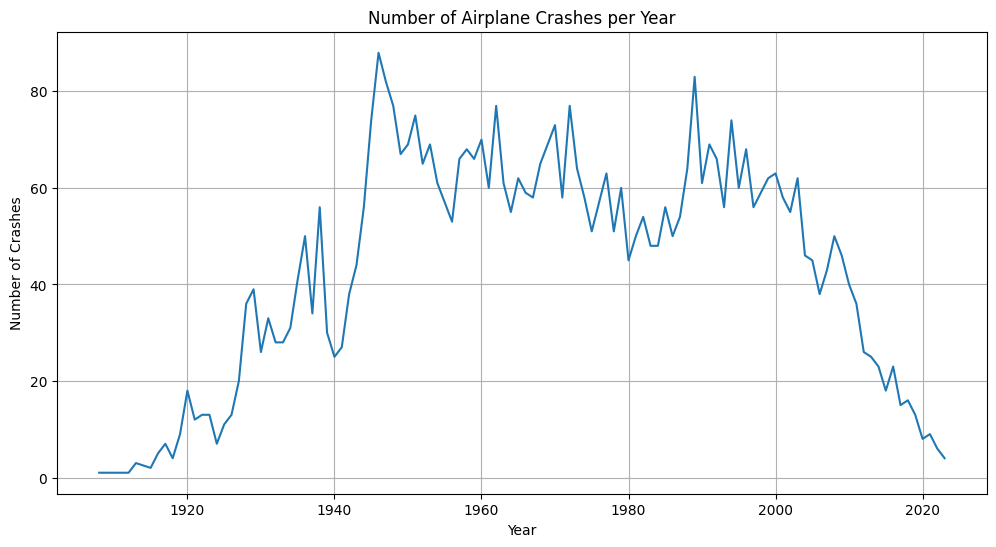

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(x=crashes_per_year.index, y=crashes_per_year.values)

plt.title("Number of Airplane Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True)

plt.show()

In [12]:
import numpy as np
from scipy import stats

fatalities = df["Fatalities"]

print("Mean:", np.mean(fatalities))
print("Median:", np.median(fatalities))
print("Standard Deviation:", np.std(fatalities))
print("Skewness:", stats.skew(fatalities))
print("Kurtosis:", stats.kurtosis(fatalities))

Mean: 22.337735094037615
Median: 11.0
Standard Deviation: 35.04157452812883
Skewness: 4.607867742724986
Kurtosis: 36.62827882593468


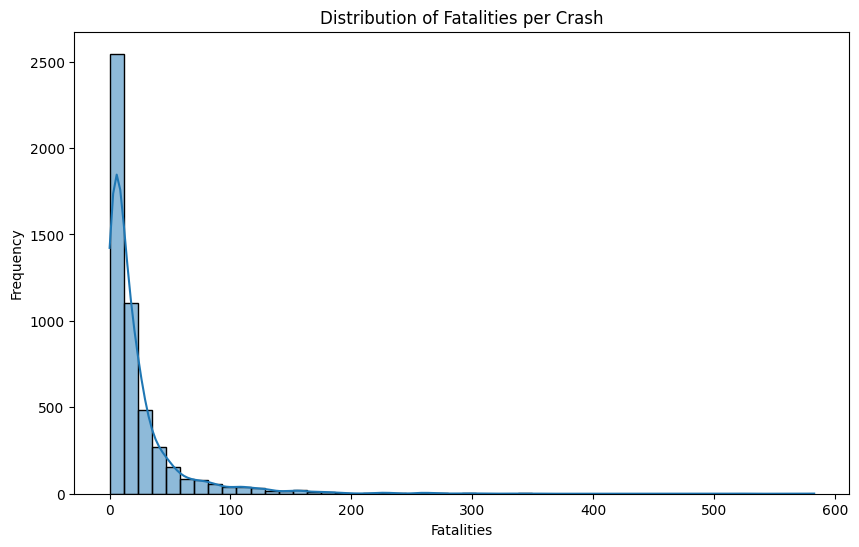

In [13]:
plt.figure(figsize=(10,6))

sns.histplot(df["Fatalities"], bins=50, kde=True)

plt.title("Distribution of Fatalities per Crash")
plt.xlabel("Fatalities")
plt.ylabel("Frequency")

plt.show()

In [14]:
from scipy.stats import ttest_ind

# Select decades
fatal_1940s = df[(df["Year"] >= 1940) & (df["Year"] <= 1949)]["Fatalities"]
fatal_2000s = df[(df["Year"] >= 2000) & (df["Year"] <= 2009)]["Fatalities"]

print("Mean 1940s:", fatal_1940s.mean())
print("Mean 2000s:", fatal_2000s.mean())

# Welch t-test
t_stat, p_value = ttest_ind(fatal_1940s, fatal_2000s, equal_var=False)

print("\nT-statistic:", t_stat)
print("P-value:", p_value)

Mean 1940s: 15.365051903114187
Mean 2000s: 22.08300395256917

T-statistic: -3.7196528778054834
P-value: 0.00021908854418255968


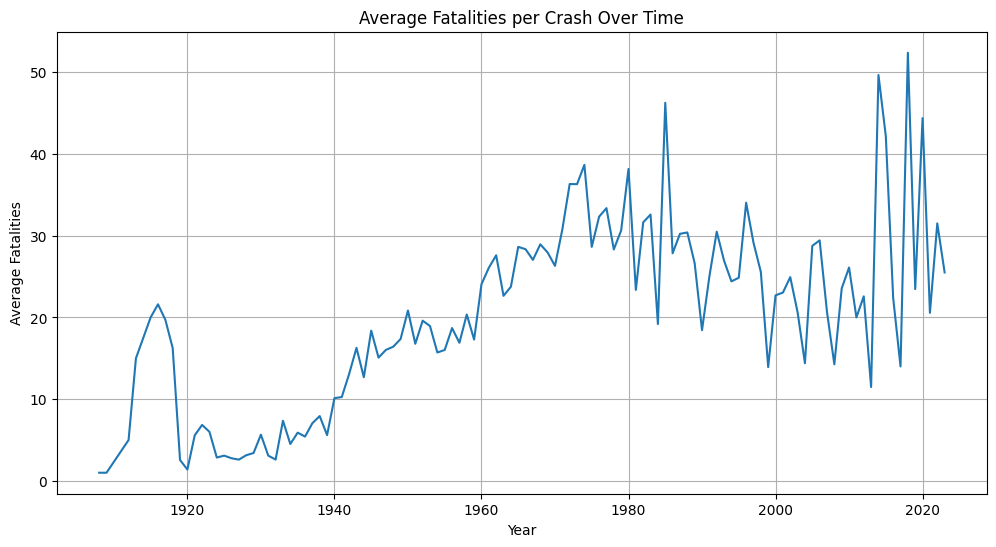

In [15]:
avg_fatalities_per_year = df.groupby("Year")["Fatalities"].mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=avg_fatalities_per_year.index,
             y=avg_fatalities_per_year.values)

plt.title("Average Fatalities per Crash Over Time")
plt.xlabel("Year")
plt.ylabel("Average Fatalities")
plt.grid(True)
plt.show()

In [ ]:
# Airplane Crashes Analysis Summary
# Data Preparation

# Converted Date to datetime and extracted Year.

# Filled missing numeric values.

# Corrected cases where fatalities exceeded passengers aboard.

# Created Survivors and Survival_Rate columns.

# Key Findings

# Total crashes: 4,998

# Total fatalities: 111,644

# Average fatalities per crash: 22.3

# Average survival rate: 18%

# Trend Over Time

# Peak crash year: 1946 (88 crashes).

# Strong decline in number of crashes after 2000.

# Average fatalities per crash increased over decades.

# Statistical Results

# Fatalities distribution is highly right-skewed.

# Significant difference between 1940s and 2000s fatalities (p < 0.001).

# Conclusion

# Air travel has become significantly safer in terms of crash frequency, but when crashes occur in modern times, they often involve larger aircraft and therefore higher fatalities.